In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle


In [3]:
df=pd.read_csv("C:\\Users\\Purushoth\\Desktop\\Closeing\\Apple\\AAPL(ClosingVal-tomorrow).csv")

In [4]:
df.head()

,Date,Open,High,Low,Volume,Close
0,1/2/1998,0.121652,0.145089,0.120536,718110400,0.141741
1,1/5/1998,0.147321,0.147879,0.135603,651873600,0.169085
2,1/6/1998,0.142299,0.178571,0.131696,1812473600,0.156250
3,1/7/1998,0.167969,0.169643,0.154576,1041622400,0.162388
4,1/8/1998,0.155692,0.166295,0.151228,774020800,0.162388


In [5]:
df.tail()

,Date,Open,High,Low,Volume,Close
5839,3/18/2021,122.879997,123.180000,120.320000,121229700,119.989998
5840,3/19/2021,119.900002,121.430000,119.680000,185023200,123.389999
5841,3/22/2021,120.330002,123.870003,120.260002,111912300,122.540001
5842,3/23/2021,123.330002,124.239998,122.139999,95467100,120.089996
5843,3/24/2021,122.820000,122.900002,120.070000,88530500,120.589996


In [6]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [7]:
df.shape

(5844, 6)

In [8]:
del df['Date']

In [9]:
X=df
X=np.array(X.drop(['Close'],1))
y=np.array(df['Close'])

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
xtrain.shape

(4675, 4)

In [12]:
ytrain.shape

(4675,)

In [13]:
xtest.shape

(1169, 4)

In [14]:
ytest.shape

(1169,)

### Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [17]:
rf_predictions = rf.predict(xtest)
rf_predictions

array([ 5.16959643,  0.386692  ,  0.36620666, ..., 47.71782454,
       42.87502453, 51.6396752 ])

In [18]:
def mda(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(ytest[1:]-ytest[:-1])== np.sign(predicted[1:]- predicted[:-1])).astype(int))

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, rf_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, rf_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, rf_predictions)))
print('Mean Directional Accuracy:', mda(ytest, rf_predictions))

Mean Absolute Error: 0.28949046289991426
Mean Squared Error: 0.4993986537490465
Root Mean Squared Error: 0.7066814372466893
Mean Directional Accuracy: 0.990582191780822


### Predicting for 7th April using 6th Open, High, Low, Volume 

In [20]:
rf.predict([[126.5,127.13,125.65,79463200]])

array([125.20380016])

### Graph

In [21]:
import matplotlib.pyplot as plt

In [23]:
newdf=pd.read_csv("C:\\Users\\Purushoth\\Desktop\\Closeing\\Apple\\Apple(DataFrom26March)-Tomorrow.csv")

In [24]:
newdf.head()

,Date,Open,High,Low,Volume,Close
0,26-Mar-21,120.349998,121.480003,118.919998,93958900,121.389999
1,29-Mar-21,121.650002,122.580002,120.730003,80819200,119.900002
2,30-Mar-21,120.110001,120.400002,118.860001,85671900,122.150002
3,31-Mar-21,121.650002,123.519997,121.150002,118323800,123.000000
4,1-Apr-21,123.660004,124.180000,122.489998,74957400,125.900002


In [25]:
keep_columns=['Open','High','Low','Volume']
newxval=newdf[keep_columns]

In [26]:
predictions = rf.predict(newxval)

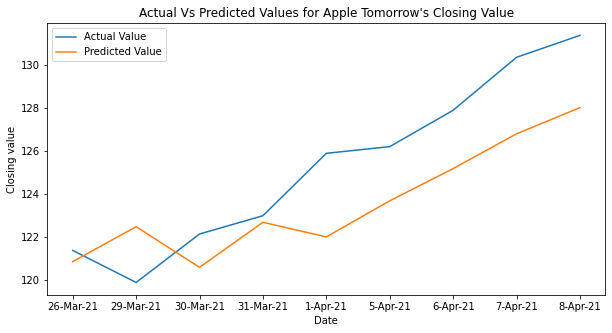

In [27]:
plt.figure(figsize=(10,5))
plt.plot(newdf['Date'],newdf['Close'], label ='Actual Value')
plt.plot(newdf['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for Apple Tomorrow's Closing Value")
plt.legend()

In [28]:
pickle.dump(rf, open("aapl_tommorrowPrediction.pkl", 'wb'))
print('model saved...')

model saved...
